In [22]:
import numpy as np

def generate_data(n_samples, mean_class_0, mean_class_1):
    np.random.seed(0)

    # Class 0: Gaussian distribution with given mean and identity covariance matrix
    cov_class_0 = np.eye(len(mean_class_0))

    # Class 1: Gaussian distribution with given mean and identity covariance matrix
    cov_class_1 = np.eye(len(mean_class_1))

    # Generate samples for each class
    class_0_samples = np.random.multivariate_normal(mean_class_0, cov_class_0, n_samples // 2)
    class_1_samples = np.random.multivariate_normal(mean_class_1, cov_class_1, n_samples // 2)

    # Create labels
    y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

    # Combine samples and labels
    X = np.vstack((class_0_samples, class_1_samples))

    return X, y

# Example usage:
if __name__ == "__main__":
    n_train = 4096
    n_test = 8192
    mean_class_0 = [3, 3, 3, 3]
    mean_class_1 = [-3, -3, -3, -3]
    X_train, y_train = generate_data(n_train, mean_class_0, mean_class_1)
    X_test, y_test = generate_data(n_test, mean_class_0, mean_class_1)


In [23]:
class LogisticRegression:
    def __init__(self, input_size):
        self.input_size = input_size
        self.weights = np.zeros(input_size)  # Initialize weights as zeros

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

    def compute_gradient(self, X, y):
        m = len(X)
        y_pred = self.sigmoid(X.dot(self.weights))
        gradient = (1 / m) * X.T.dot(y_pred - y)
        return gradient

    def mini_batch_gradient_descent(self, X, y, learning_rate, num_epochs, batch_size):
        m, n = X.shape
        loss_history = []

        for epoch in range(num_epochs):
            # Shuffle the data
            permutation = np.random.permutation(m)
            X = X[permutation]
            y = y[permutation]

            for i in range(0, m, batch_size):
                X_mini_batch = X[i:i + batch_size]
                y_mini_batch = y[i:i + batch_size]
                gradient = self.compute_gradient(X_mini_batch, y_mini_batch)
                self.weights -= learning_rate * gradient

            loss = self.compute_loss(y, self.sigmoid(X.dot(self.weights)))
            loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")

        return loss_history
if __name__ == "__main__":
    n_train = 4096
    n_test = 8192
    mean_class_0 = [3, 3, 3, 3]
    mean_class_1 = [-3, -3, -3, -3]
    X_train, y_train = generate_data(n_train, mean_class_0, mean_class_1)
    X_test, y_test = generate_data(n_test, mean_class_0, mean_class_1)

    learning_rate = 0.1
    num_epochs = 1000
    batch_size = 32

    model = LogisticRegression(input_size=X_train.shape[1])
    loss_history = model.mini_batch_gradient_descent(X_train, y_train, learning_rate, num_epochs, batch_size)

    # Testing the model
    y_pred = model.sigmoid(X_test.dot(model.weights))
    y_pred_class = (y_pred >= 0.5).astype(int)

    # Calculate accuracy
    accuracy = np.mean(y_pred_class == y_test)
    print(f"Test Accuracy: {accuracy}")




Epoch 0: Loss = 0.003012828326440161
Epoch 100: Loss = 4.5879628423496304e-05
Epoch 200: Loss = 2.4930514083502205e-05
Epoch 300: Loss = 1.7457903963844235e-05
Epoch 400: Loss = 1.3562331810465304e-05
Epoch 500: Loss = 1.1151983433032327e-05
Epoch 600: Loss = 9.505168957203244e-06
Epoch 700: Loss = 8.304541752719563e-06
Epoch 800: Loss = 7.388078806056566e-06
Epoch 900: Loss = 6.664167650098108e-06
Test Accuracy: 1.0


**Experiment 1 How to initialize the weights and bias?**

Epoch 0: Loss = 0.003012828326440161
Epoch 100: Loss = 4.5879628423496304e-05
Epoch 200: Loss = 2.4930514083502205e-05
Epoch 300: Loss = 1.7457903963844235e-05
Epoch 400: Loss = 1.3562331810465304e-05
Epoch 500: Loss = 1.1151983433032327e-05
Epoch 600: Loss = 9.505168957203244e-06
Epoch 700: Loss = 8.304541752719563e-06
Epoch 800: Loss = 7.388078806056566e-06
Epoch 900: Loss = 6.664167650098108e-06
Epoch 0: Loss = 0.003072422002921626
Epoch 100: Loss = 4.7283483975996975e-05
Epoch 200: Loss = 2.585620048553591e-05
Epoch 300: Loss = 1.8171856979623894e-05
Epoch 400: Loss = 1.4151620780530888e-05
Epoch 500: Loss = 1.1657523657489103e-05
Epoch 600: Loss = 9.949864657598097e-06
Epoch 700: Loss = 8.702695758971416e-06
Epoch 800: Loss = 7.749291763915709e-06
Epoch 900: Loss = 6.995237655270767e-06
Epoch 0: Loss = 0.0030116730107659223
Epoch 100: Loss = 4.589989209780335e-05
Epoch 200: Loss = 2.494606221623159e-05
Epoch 300: Loss = 1.7470768706618217e-05
Epoch 400: Loss = 1.3573471486479454e-

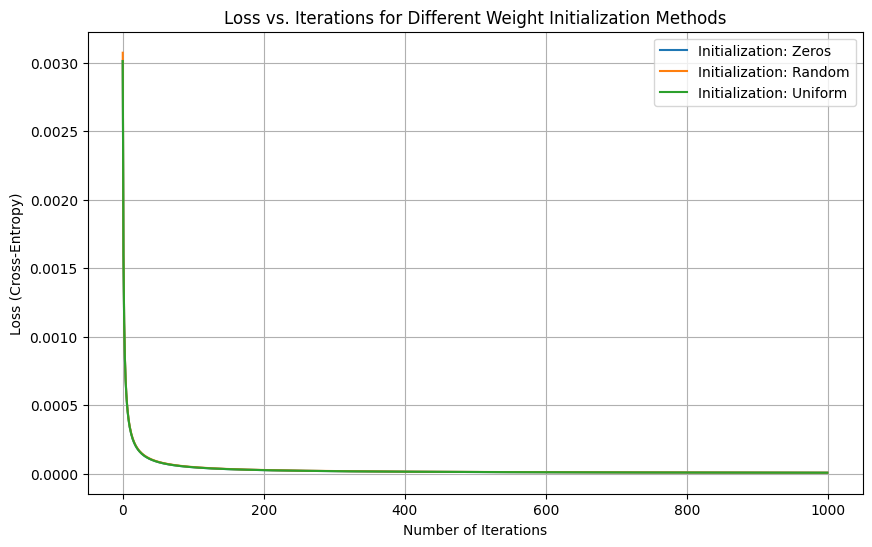

Epoch 0: Loss = 0.002997694863149925
Epoch 100: Loss = 4.589851417711709e-05
Epoch 200: Loss = 2.4946453540647768e-05
Epoch 300: Loss = 1.7471208747372424e-05
Epoch 400: Loss = 1.3573838141035188e-05
Epoch 500: Loss = 1.1162154623090088e-05
Epoch 600: Loss = 9.514305249998053e-06
Epoch 700: Loss = 8.312859656440925e-06
Epoch 800: Loss = 7.395730533465251e-06
Epoch 900: Loss = 6.671261930362534e-06
Test Accuracy with Uniform Initialization: 1.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the weight initialization methods
initialization_methods = ['zeros', 'random', 'uniform']

# Initialize lists to store loss history for each method
loss_histories = {}

# Experiment setup
n_train = 4096
n_test = 8192
mean_class_0 = [3, 3, 3, 3]
mean_class_1 = [-3, -3, -3, -3]
X_train, y_train = generate_data(n_train, mean_class_0, mean_class_1)
X_test, y_test = generate_data(n_test, mean_class_0, mean_class_1)
learning_rate = 0.1
num_epochs = 1000
batch_size = 32

# Perform experiments for each weight initialization method
for method in initialization_methods:
    model = LogisticRegression(input_size=X_train.shape[1])

    if method == 'random':
        model.weights = np.random.rand(X_train.shape[1])
    elif method == 'uniform':
        model.weights = np.random.uniform(-0.01, 0.01, X_train.shape[1])

    loss_history = model.mini_batch_gradient_descent(X_train, y_train, learning_rate, num_epochs, batch_size)
    loss_histories[method] = loss_history

# Plot the loss against the number of iterations for each initialization method
plt.figure(figsize=(10, 6))
for method in initialization_methods:
    plt.plot(range(num_epochs), loss_histories[method], label=f'Initialization: {method.capitalize()}')

plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Cross-Entropy)')
plt.title('Loss vs. Iterations for Different Weight Initialization Methods')
plt.legend()
plt.grid(True)
plt.show()

# Testing the model with the best initialization method (e.g., 'uniform')
best_method = 'uniform'
model = LogisticRegression(input_size=X_train.shape[1])
model.weights = np.random.uniform(-0.01, 0.01, X_train.shape[1])
loss_history = model.mini_batch_gradient_descent(X_train, y_train, learning_rate, num_epochs, batch_size)

# Testing the model
y_pred = model.sigmoid(X_test.dot(model.weights))
y_pred_class = (y_pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred_class == y_test)
print(f"Test Accuracy with {best_method.capitalize()} Initialization: {accuracy}")


**Experiment 2: Compare stochastic, batch and mini-batch gradient descent.**

Epoch 0: Loss = 0.0002414471911163753
Epoch 100: Loss = 3.996819462746409e-06
Epoch 200: Loss = 2.1861732839921764e-06
Epoch 300: Loss = 1.5328893351689476e-06
Epoch 400: Loss = 1.1903551065788884e-06
Epoch 500: Loss = 9.776937109320806e-07
Epoch 600: Loss = 8.320878186299677e-07
Epoch 700: Loss = 7.257893488887282e-07
Epoch 800: Loss = 6.445820337995999e-07
Epoch 900: Loss = 5.804062898422939e-07
Epoch 0: Loss = 0.003003818161032049
Epoch 100: Loss = 4.590444115714186e-05
Epoch 200: Loss = 2.49483383644548e-05
Epoch 300: Loss = 1.7472216863594765e-05
Epoch 400: Loss = 1.3574465823638098e-05
Epoch 500: Loss = 1.1162582232187035e-05
Epoch 600: Loss = 9.514632829701795e-06
Epoch 700: Loss = 8.313115967188938e-06
Epoch 800: Loss = 7.395933946549232e-06
Epoch 900: Loss = 6.671433665849197e-06
Epoch 0: Loss = 0.019523328150369505
Epoch 100: Loss = 0.00029654725229889703
Epoch 200: Loss = 0.00015928998682512068
Epoch 300: Loss = 0.00011081285727045256
Epoch 400: Loss = 8.570302201500816e-05


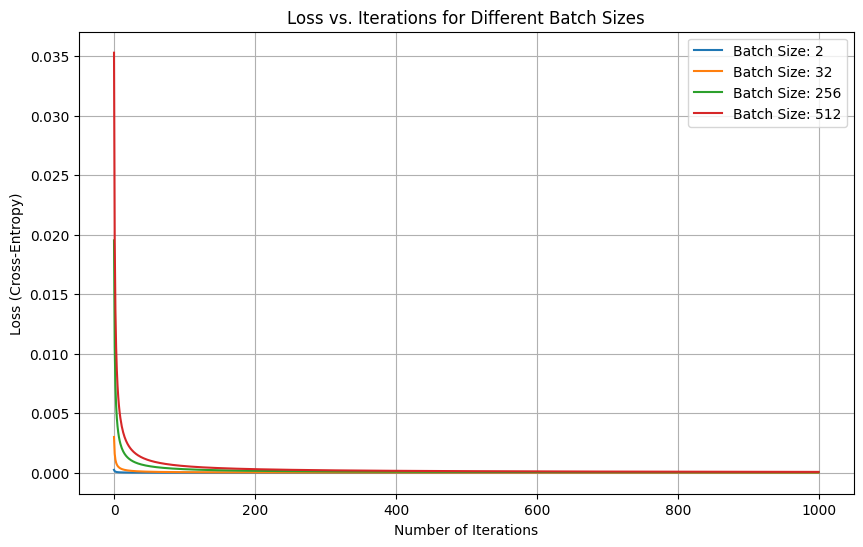

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the weight initialization method
initialization_method = 'zeros'

# Initialize lists to store loss history for each batch size
loss_histories = {}

# Experiment setup
n_train = 4096
n_test = 8192
mean_class_0 = [3, 3, 3, 3]
mean_class_1 = [-3, -3, -3, -3]
X_train, y_train = generate_data(n_train, mean_class_0, mean_class_1)
X_test, y_test = generate_data(n_test, mean_class_0, mean_class_1)
learning_rate = 0.1
num_epochs = 1000
batch_sizes = [2, 32, 256, 512]

# Perform experiments for each batch size
for batch_size in batch_sizes:
    model = LogisticRegression(input_size=X_train.shape[1])
    loss_history = model.mini_batch_gradient_descent(X_train, y_train, learning_rate, num_epochs, batch_size)
    loss_histories[batch_size] = loss_history

# Plot the loss against the number of iterations for each batch size
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(range(num_epochs), loss_histories[batch_size], label=f'Batch Size: {batch_size}')

plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Cross-Entropy)')
plt.title('Loss vs. Iterations for Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()


**Experiment 3:  How learning rate affect the time to converge?**

Epoch 0: Loss = 0.005793026468856991
Epoch 100: Loss = 8.515266704580721e-05
Epoch 200: Loss = 4.608780744083142e-05
Epoch 300: Loss = 3.2206351989303233e-05
Epoch 400: Loss = 2.4986605408124505e-05
Epoch 500: Loss = 2.0526912350840062e-05
Epoch 600: Loss = 1.748386834001476e-05
Epoch 700: Loss = 1.5267620338522332e-05
Epoch 800: Loss = 1.3577382769051981e-05
Epoch 900: Loss = 1.224325549488967e-05
Epoch 0: Loss = 0.003003818161032049
Epoch 100: Loss = 4.590444115714186e-05
Epoch 200: Loss = 2.49483383644548e-05
Epoch 300: Loss = 1.7472216863594765e-05
Epoch 400: Loss = 1.3574465823638098e-05
Epoch 500: Loss = 1.1162582232187035e-05
Epoch 600: Loss = 9.514632829701795e-06
Epoch 700: Loss = 8.313115967188938e-06
Epoch 800: Loss = 7.395933946549232e-06
Epoch 900: Loss = 6.671433665849197e-06
Epoch 0: Loss = 0.001543545203758058
Epoch 100: Loss = 2.477998287385316e-05
Epoch 200: Loss = 1.3510673097107202e-05
Epoch 300: Loss = 9.475794437711474e-06
Epoch 400: Loss = 7.3678168514535474e-06


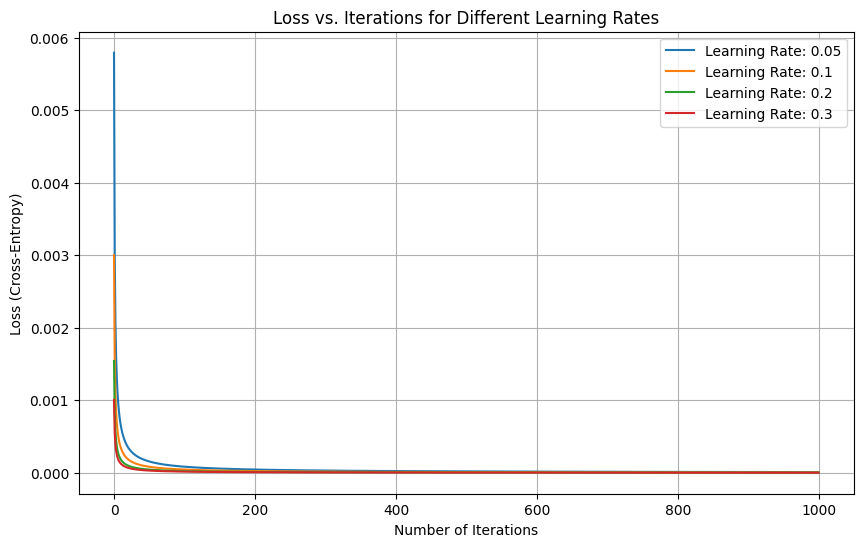

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the weight initialization method
initialization_method = 'zeros'

# Initialize lists to store loss history for each learning rate
loss_histories = {}

# Experiment setup
n_train = 4096
n_test = 8192
mean_class_0 = [3, 3, 3, 3]
mean_class_1 = [-3, -3, -3, -3]
X_train, y_train = generate_data(n_train, mean_class_0, mean_class_1)
X_test, y_test = generate_data(n_test, mean_class_0, mean_class_1)
batch_size = 32
num_epochs = 1000
learning_rates = [0.05, 0.1, 0.2, 0.3]

# Perform experiments for each learning rate
for learning_rate in learning_rates:
    model = LogisticRegression(input_size=X_train.shape[1])
    loss_history = model.mini_batch_gradient_descent(X_train, y_train, learning_rate, num_epochs, batch_size)
    loss_histories[learning_rate] = loss_history

# Plot the loss against the number of iterations for each learning rate
plt.figure(figsize=(10, 6))
for learning_rate in learning_rates:
    plt.plot(range(num_epochs), loss_histories[learning_rate], label=f'Learning Rate: {learning_rate}')

plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Cross-Entropy)')
plt.title('Loss vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()
